In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [115]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [117]:
df.groupby('Cabin_N')['Cabin_N'].value_counts()

Cabin_N  Cabin_N
A        A           15
B        B           47
C        C           59
D        D           33
E        E           32
F        F           13
G        G            4
T        T            1
n        n          687
Name: Cabin_N, dtype: int64

In [116]:
df['Cabin_N'] = df['Cabin'].astype('str').str[0]
# Too many NaN, useless
#df['Cabin_N'].replace('n',np.nan,inplace=True)
percent_of_nan = df['Cabin_N'].isnull().sum()/891
print ('Percent of NaN: {:0.2f}'.format(percent_of_nan))
print ('Percent of NaN: %.2f'% percent_of_nan)

Percent of NaN: 0.00
Percent of NaN: 0.00


In [8]:
df = df[df['Embarked'].notnull()]

In [9]:
df['Age'] = df.groupby(['Sex', 'Pclass','Embarked'])['Age'].apply(lambda x: x.fillna(x.median()))

In [10]:
# Recode Sex 1 == male, 0 == female.
df['Sex'] = [1 if i == 'male' else 0 for i in df.Sex]

### Strip the title, credit to Ahmed BESBES https://www.kaggle.com/c/titanic/data

In [11]:
df['Name_title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [12]:
df.groupby('Name_title')['Name_title'].value_counts()

Name_title    Name_title  
Capt          Capt              1
Col           Col               2
Don           Don               1
Dr            Dr                7
Jonkheer      Jonkheer          1
Lady          Lady              1
Major         Major             2
Master        Master           40
Miss          Miss            181
Mlle          Mlle              2
Mme           Mme               1
Mr            Mr              517
Mrs           Mrs             124
Ms            Ms                1
Rev           Rev               6
Sir           Sir               1
the Countess  the Countess      1
Name: Name_title, dtype: int64

In [13]:
Title_Dictionary = { 
                    "Capt":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Jonkheer":"Royalty", 
                    "Don":"Royalty",
                    "Sir":"Royalty",
                    "Dr":"Officer", 
                    "Rev":"Officer",
                    "the Countess":"Royalty",
                    "Dona":"Royalty",
                    "Mme":"Mrs",
                    "Mlle":"Miss",
                    "Ms":"Mrs",
                    "Mr":"Mr",
                    "Mrs":"Mrs",
                    "Miss":"Miss",
                    "Master":"Master",
                    "Lady":"Royalty"
                    }

In [ ]:
df['Name_title'] = df['Name_title'].map(Title_Dictionary)

In [14]:
df.groupby('Name_title')['Name_title'].value_counts()

Name_title  Name_title
Master      Master         40
Miss        Miss          183
Mr          Mr            517
Mrs         Mrs           126
Officer     Officer        18
Royalty     Royalty         5
Name: Name_title, dtype: int64

In [15]:
df.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

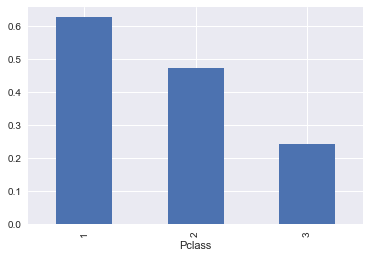

In [16]:
df.groupby('Pclass').mean()['Survived'].plot(kind='bar')

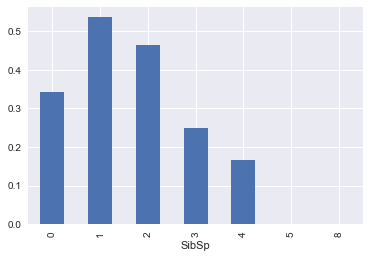

In [17]:
df.groupby('SibSp').mean()['Survived'].plot(kind='bar')

In [18]:
df['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [19]:
df['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [20]:
Pclass_dummies = pd.get_dummies(df.Pclass,prefix='Class')
Embarked_dummies = pd.get_dummies(df.Embarked,prefix='Embarked')
Title_dummies = pd.get_dummies(df.Name_title, prefix='Title')

In [21]:
df = pd.concat([df,Pclass_dummies,Embarked_dummies,Title_dummies],axis=1)

In [22]:
df.drop(['Name','Pclass','Ticket','Name_title','Cabin','Cabin_N','Embarked','PassengerId'],axis=1,inplace=True)

In [23]:
df.isnull().sum()

Survived         0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Class_1          0
Class_2          0
Class_3          0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
dtype: int64

## Detect collinearity, corr score >0.5 or < -0.5

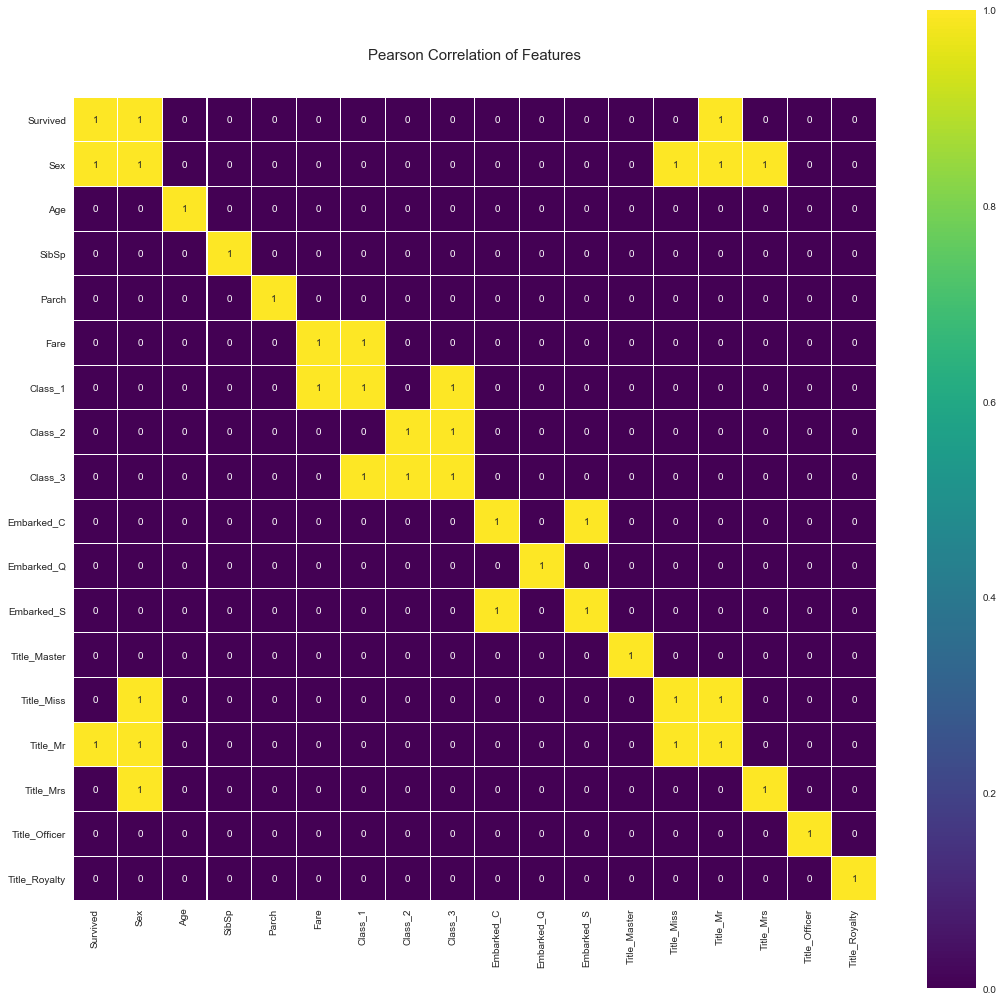

In [24]:
colormap = plt.cm.viridis
plt.figure(figsize=(18,18))
plt.title('Pearson Correlation of Features', y=1.04, size=15)
sns.heatmap(((df.corr()<-0.5 )| (df.corr()> 0.5)),linewidths=0.02,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [25]:
df.skew()

Survived          0.484568
Sex              -0.625625
Age               0.515303
SibSp             3.691058
Parch             2.745160
Fare              4.801440
Class_1           1.214999
Class_2           1.448999
Class_3          -0.210734
Embarked_C        1.591610
Embarked_Q        2.944406
Embarked_S       -1.006192
Title_Master      4.397425
Title_Miss        1.457497
Title_Mr         -0.331196
Title_Mrs         2.057906
Title_Officer     6.823975
Title_Royalty    13.243766
dtype: float64

## Feature selection, univariate Selection

In [26]:
X = df.iloc[:,1:]
Y = df['Survived']
X_columns = X.columns

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2)
fit = model.fit(X, Y)

In [28]:
df_features = pd.DataFrame(data=fit.scores_,index = X_columns,columns=['Score'])
df_features.sort_values(by='Score',ascending=False)

,Score
Fare,4453.394597
Title_Mr,111.586126
Sex,91.514037
Title_Mrs,90.204055
Title_Miss,77.862007
Class_1,53.818827
Class_3,40.798666
Age,27.912433
Embarked_C,20.828558
Parch,10.448598


In [22]:
seed = 7
validation_size = 0.20
num_folds = 10
scoring = 'accuracy'

## Look like we can keep them all, or just remove the last few features. Let's try use all of them first

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [31]:
X_train.shape,X_validation.shape,Y_train.shape, Y_validation.shape

((711, 17), (178, 17), (711,), (178,))

## Data Standardization, for models that rely on the distribution of attributes such as Gaussian processes.

## Data Normalization, for model that rely on the magnitude of values

## Import all the models

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier

## Before hyperparameter tuning, data has Multicollinearity, will affect linear and logistic models.

Any linear and logistic regression can have poor performance if there are highly correlated input variables in the data.Yet still keep the data because I am running other models at the same time. 

In [33]:
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MNB',MultinomialNB()))
models.append(('AB', AdaBoostClassifier()))
models.append(('BAG', BaggingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append((name,[cv_results.mean()]))
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.824178 (0.028412)
KNN: 0.728521 (0.050549)
CART: 0.776408 (0.053057)
GNB: 0.793192 (0.046077)
SVM: 0.739750 (0.034973)
MNB: 0.703208 (0.074472)
AB: 0.808685 (0.039072)
BAG: 0.796029 (0.045654)
RF: 0.796068 (0.030964)
ET: 0.796107 (0.042105)


In [34]:
pred_before = pd.DataFrame.from_items(names,orient='index',columns=['before_training_socre'])
pred_before

,before_training_socre
LR,0.824178
KNN,0.728521
CART,0.776408
GNB,0.793192
SVM,0.739750
MNB,0.703208
AB,0.808685
BAG,0.796029
RF,0.796068
ET,0.796107


## Hyperparameter tuning

In [36]:
## Logistic regression
model = LogisticRegression(random_state=seed)
penalty = {'penalty ':('l1','l2')}
kfold = KFold(n_splits=num_folds, random_state=seed)
solver = {'solver':('newton-cg','lbfgs','liblinear','sag')}
c = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
parameters = {'solver':('newton-cg','lbfgs','liblinear','sag'),'C': [0.1,100,1000,3000],'max_iter':[7000]}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
results =pd.DataFrame(clf.cv_results_)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.827004 using {'C': 100, 'max_iter': 7000, 'solver': 'newton-cg'}


In [37]:
# KNeighborsClassifier, use random search, grid search too slow
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
n = list(range(1,70))
neighbour = {'n_neighbors':n}
parameters = {'n_neighbors':n}
clf = RandomizedSearchCV(estimator=model, param_distributions=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.729958 using {'n_neighbors': 6}


In [38]:
#DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n = list(range(2,20))
min_num_split = {'min_samples_split':n}
parameters = {'min_samples_split':n}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.798875 using {'min_samples_split': 14}


In [39]:
# GaussianNB() doesn't have parameters to adjust

## SVC takes forever, skip this for now

In [40]:
#MultinomialNB
np.logspace(-3, 3, 10)
model = MultinomialNB()
kfold = KFold(n_splits=num_folds, random_state=seed)
alpha = {'alpha':np.logspace(-5, 5, 20).tolist()}
parameters = {'alpha':np.logspace(-5, 5, 20).tolist()}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.704641 using {'alpha': 1e-05}


In [41]:
#AdaBoostClassifier
model = AdaBoostClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(35,80))}
parameters = {'n_estimators':list(range(35,80))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.815752 using {'n_estimators': 49}


In [42]:
#BaggingClassifier
model = BaggingClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(2,20))}
parameters = {'n_estimators':list(range(2,20))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.803094 using {'n_estimators': 18}


In [43]:
#RandomForestClassifier
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(2,20))}
parameters = {'n_estimators':list(range(2,20))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.819972 using {'n_estimators': 16}


In [44]:
#ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(2,20))}
parameters = {'n_estimators':list(range(2,20))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.808720 using {'n_estimators': 18}


## After hyperparameter tuning

In [35]:
models = []
models.append(('LR', LogisticRegression(C=100, max_iter= 7000, solver='newton-cg',random_state=seed)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=6)))
models.append(('CART', DecisionTreeClassifier(min_samples_split=14,random_state=seed)))
models.append(('GNB', GaussianNB()))
#models.append(('SVM', SVC(gamma= , kernel= 'rbf',random_state=seed)))
models.append(('MNB',MultinomialNB(alpha= 1e-05)))
models.append(('AB', AdaBoostClassifier(n_estimators=49,random_state=seed)))
models.append(('BAG', BaggingClassifier(n_estimators=18,random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=16,random_state=seed)))
models.append(('ET', ExtraTreesClassifier(n_estimators=18,random_state=seed)))
results = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    model.fit(X_train, Y_train)
    pred = model.predict(X_validation)
    accuracy = accuracy_score(Y_validation,pred)
    results.append((name,[cv_results.mean(),accuracy]))
    msg = "%s: %f (%f) %f" % (name, cv_results.mean(), cv_results.std(), accuracy)
    print(msg)

LR: 0.826976 (0.030378) 0.814607
KNN: 0.729890 (0.044776) 0.724719
CART: 0.798905 (0.051824) 0.848315
GNB: 0.793192 (0.046077) 0.803371
MNB: 0.704617 (0.071627) 0.685393
AB: 0.815728 (0.034869) 0.808989
BAG: 0.803110 (0.052628) 0.842697
RF: 0.819992 (0.050620) 0.820225
ET: 0.808764 (0.046153) 0.803371


In [36]:
pred_after = pd.DataFrame.from_items(results,orient='index',columns=['after_training_socre','validation_score'])
pred_after

,after_training_socre,validation_score
LR,0.826976,0.814607
KNN,0.729890,0.724719
CART,0.798905,0.848315
GNB,0.793192,0.803371
MNB,0.704617,0.685393
AB,0.815728,0.808989
BAG,0.803110,0.842697
RF,0.819992,0.820225
ET,0.808764,0.803371


In [37]:
Final_prediction = pd.concat([pred_before,pred_after],axis=1)
Final_prediction

,before_training_socre,after_training_socre,validation_score
AB,0.808685,0.815728,0.808989
BAG,0.796029,0.803110,0.842697
CART,0.776408,0.798905,0.848315
ET,0.796107,0.808764,0.803371
GNB,0.793192,0.793192,0.803371
KNN,0.728521,0.729890,0.724719
LR,0.824178,0.826976,0.814607
MNB,0.703208,0.704617,0.685393
RF,0.796068,0.819992,0.820225
SVM,0.739750,NaN,NaN


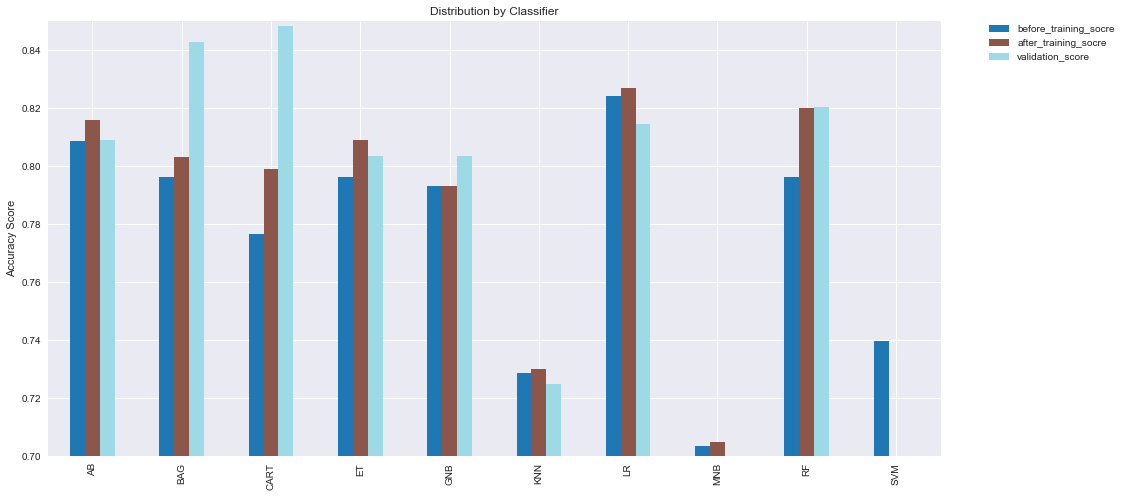

In [38]:
Final_prediction.plot(kind='bar',ylim=(0.70,0.85), figsize=(16,8), align='center',colormap="tab20")
plt.xticks(np.arange(10),Final_prediction.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Predict on the new dataset

In [39]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
df_test['Age'] = df_test.groupby(['Sex', 'Pclass','Embarked'])['Age'].apply(lambda x: x.fillna(x.median()))
df_test['Sex'] = [1 if i == 'male' else 0 for i in df_test.Sex]

In [41]:
df_test['Name_title'] = df_test['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df_test['Name_title'] = df_test['Name_title'].map(Title_Dictionary)

In [42]:
Pclass_dummies = pd.get_dummies(df_test.Pclass,prefix='Class')
Embarked_dummies = pd.get_dummies(df_test.Embarked,prefix='Embarked')
Title_dummies = pd.get_dummies(df_test.Name_title, prefix='Title')

In [43]:
df_test = pd.concat([df_test,Pclass_dummies,Embarked_dummies,Title_dummies],axis=1)
df_test.drop(['Name','Pclass','Ticket','Name_title','Cabin','Embarked'],axis=1,inplace=True)
df_test.isnull().sum()

PassengerId      0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Class_1          0
Class_2          0
Class_3          0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
dtype: int64

In [44]:
df_test['Fare'].fillna(df_test.Fare.median(),inplace=True)

In [45]:
df_test.isnull().sum()

PassengerId      0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Class_1          0
Class_2          0
Class_3          0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
dtype: int64

In [46]:
X_test = df_test.iloc[:,1:]

## Random Forest Classifier gets about 77% prediction accurate

In [47]:
model = RandomForestClassifier(n_estimators=16,random_state=seed)
model.fit(X,Y)
pred = model.predict(X_test)
df_test['Survived'] = pred

In [48]:
df_test.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Survived
0,892,1,34.5,0,0,7.8292,0,0,1,0,1,0,0,0,1,0,0,0,0
1,893,0,47.0,1,0,7.0000,0,0,1,0,0,1,0,0,0,1,0,0,0
2,894,1,62.0,0,0,9.6875,0,1,0,0,1,0,0,0,1,0,0,0,0
3,895,1,27.0,0,0,8.6625,0,0,1,0,0,1,0,0,1,0,0,0,0
4,896,0,22.0,1,1,12.2875,0,0,1,0,0,1,0,0,0,1,0,0,1


In [124]:
df_submitted = df_test[['PassengerId','Survived']]

In [125]:
df_submitted.to_csv('final.csv',index=False)

## Logistic Regression also gets about 77% prediction accurate

In [49]:
model = LogisticRegression(C=100, max_iter= 7000, solver='newton-cg',random_state=seed)
model.fit(X,Y)
pred = model.predict(X_test)
df_test['Survived'] = pred

In [50]:
df_submitted = df_test[['PassengerId','Survived']]
df_submitted.to_csv('final.csv',index=False)

## Things to consider

* Conbine the test and the train set in data preparation - what about data leakage? Not a good idea to process them together.
* Don't drop the cabin varible
* Potential other variables to consider? Sibsp and Parch? Ticket?

In [164]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [165]:
def data_process(df_preprocess):
    df_preprocess['Fare'].fillna(df_preprocess.Fare.median(),inplace=True)
    df_preprocess['Embarked'].fillna('S',inplace=True)
    df_preprocess['Age'] = df_preprocess.groupby(['Sex', 'Pclass','Embarked'])['Age'].apply(lambda x: x.fillna(x.median()))
    df_preprocess['Sex'] = [1 if i == 'male' else 0 for i in df_preprocess.Sex]
    df_preprocess['Name_title'] = df_preprocess['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
    df_preprocess['Name_title'] = df_preprocess['Name_title'].map(Title_Dictionary)
    df_preprocess['Cabin_N'] = df_preprocess['Cabin'].astype('str').str[0]
    
    Pclass_dummies = pd.get_dummies(df_preprocess.Pclass,prefix='Class')
    Embarked_dummies = pd.get_dummies(df_preprocess.Embarked,prefix='Embarked')
    Title_dummies = pd.get_dummies(df_preprocess.Name_title, prefix='Title')
    Cabin_dummies = pd.get_dummies(df_preprocess.Cabin_N,prefix='Cabin')
    
    df_preprocess = pd.concat([df_preprocess,Pclass_dummies,Embarked_dummies,Title_dummies,Cabin_dummies],axis=1)
    return df_preprocess

In [166]:
df = data_process(df)

In [167]:
df.drop(['Name','Pclass','Ticket','Name_title','Cabin','Embarked','Cabin_N','PassengerId'],axis=1,inplace=True)

In [168]:
df.isnull().sum()

Survived         0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Class_1          0
Class_2          0
Class_3          0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
Cabin_A          0
Cabin_B          0
Cabin_C          0
Cabin_D          0
Cabin_E          0
Cabin_F          0
Cabin_G          0
Cabin_T          0
Cabin_n          0
dtype: int64

In [169]:
X = df.iloc[:,1:]
Y = df['Survived']
X_columns = X.columns

In [170]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2)
fit = model.fit(X, Y)

In [171]:
df_features = pd.DataFrame(data=fit.scores_,index = X_columns,columns=['Score'])
df_features.sort_values(by='Score',ascending=False)

,Score
Fare,4518.319091
Title_Mr,112.805785
Sex,92.702447
Title_Mrs,90.900821
Title_Miss,78.302231
Class_1,55.175151
Class_3,41.553071
Cabin_B,25.875581
Age,24.093772
Cabin_n,20.488314


In [160]:
#df.drop(['Title_Royalty','Title_Officer','Cabin_T','Cabin_A','Cabin_G','Embarked_Q'],axis=1,inplace=True)

In [172]:
X = df.iloc[:,1:]
Y = df['Survived']

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [174]:
## Logistic regression
model = LogisticRegression(random_state=seed)
penalty = {'penalty ':('l1','l2')}
kfold = KFold(n_splits=num_folds, random_state=seed)
solver = {'solver':('newton-cg','lbfgs','liblinear','sag')}
c = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
parameters = {'solver':('newton-cg','lbfgs','liblinear','sag'),'C': [0.1,100,1000,3000],'max_iter':[7000]}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
results =pd.DataFrame(clf.cv_results_)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.834270 using {'C': 0.1, 'max_iter': 7000, 'solver': 'newton-cg'}


In [176]:
# KNeighborsClassifier, use random search, grid search too slow
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
n = list(range(1,70))
neighbour = {'n_neighbors':n}
parameters = {'n_neighbors':n}
clf = RandomizedSearchCV(estimator=model, param_distributions=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.727528 using {'n_neighbors': 15}


In [177]:
#DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n = list(range(2,20))
min_num_split = {'min_samples_split':n}
parameters = {'min_samples_split':n}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.818820 using {'min_samples_split': 16}


In [178]:
#MultinomialNB
np.logspace(-3, 3, 10)
model = MultinomialNB()
kfold = KFold(n_splits=num_folds, random_state=seed)
alpha = {'alpha':np.logspace(-5, 5, 20).tolist()}
parameters = {'alpha':np.logspace(-5, 5, 20).tolist()}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.703652 using {'alpha': 1e-05}


In [180]:
#AdaBoostClassifier
model = AdaBoostClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(35,80))}
parameters = {'n_estimators':list(range(35,80))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.825843 using {'n_estimators': 54}


In [181]:
#BaggingClassifier
model = BaggingClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(2,20))}
parameters = {'n_estimators':list(range(2,20))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.831461 using {'n_estimators': 12}


In [182]:
#RandomForestClassifier
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(2,20))}
parameters = {'n_estimators':list(range(2,20))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.834270 using {'n_estimators': 17}


In [183]:
#ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(2,20))}
parameters = {'n_estimators':list(range(2,20))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.825843 using {'n_estimators': 12}


In [184]:
models = []
models.append(('LR', LogisticRegression(C=0.1, max_iter= 7000, solver='newton-cg',random_state=seed)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=15)))
models.append(('CART', DecisionTreeClassifier(min_samples_split=16,random_state=seed)))
models.append(('GNB', GaussianNB()))
#models.append(('SVM', SVC(gamma= , kernel= 'rbf',random_state=seed)))
models.append(('MNB',MultinomialNB(alpha= 1e-05)))
models.append(('AB', AdaBoostClassifier(n_estimators=54,random_state=seed)))
models.append(('BAG', BaggingClassifier(n_estimators=12,random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=17,random_state=seed)))
models.append(('ET', ExtraTreesClassifier(n_estimators=12,random_state=seed)))
results = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    model.fit(X_train, Y_train)
    pred = model.predict(X_validation)
    accuracy = accuracy_score(Y_validation,pred)
    results.append((name,[cv_results.mean(),accuracy]))
    msg = "%s: %f (%f) %f" % (name, cv_results.mean(), cv_results.std(), accuracy)
    print(msg)

LR: 0.834311 (0.046692) 0.770950
KNN: 0.727602 (0.085946) 0.726257
CART: 0.818975 (0.061886) 0.782123
GNB: 0.792175 (0.045117) 0.748603
MNB: 0.703599 (0.065723) 0.715084
AB: 0.825900 (0.054882) 0.765363
BAG: 0.831612 (0.058690) 0.782123
RF: 0.834390 (0.053961) 0.770950
ET: 0.825978 (0.059553) 0.776536


In [185]:
pred_after = pd.DataFrame.from_items(results,orient='index',columns=['after_training_socre','validation_score'])
pred_after

,after_training_socre,validation_score
LR,0.834311,0.770950
KNN,0.727602,0.726257
CART,0.818975,0.782123
GNB,0.792175,0.748603
MNB,0.703599,0.715084
AB,0.825900,0.765363
BAG,0.831612,0.782123
RF,0.834390,0.770950
ET,0.825978,0.776536


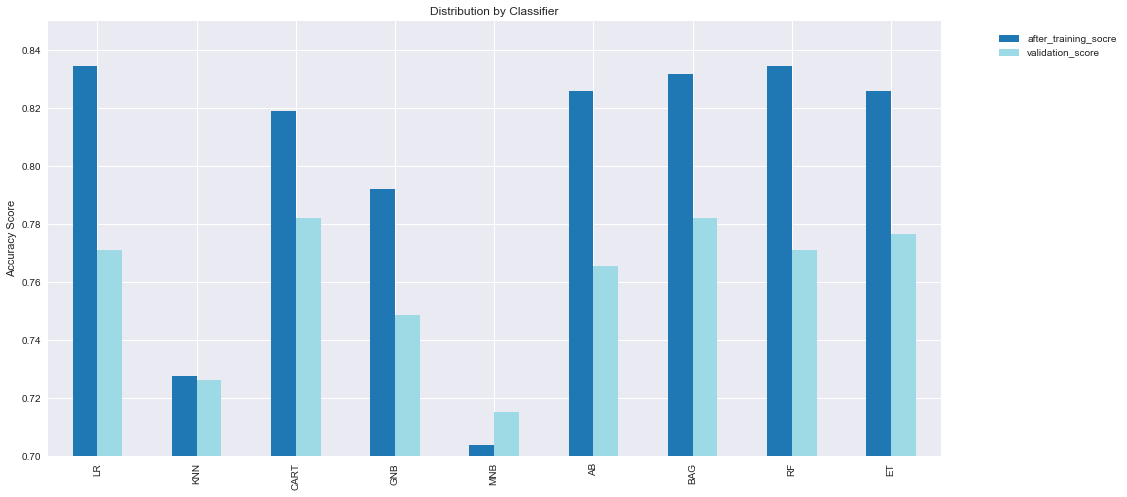

In [186]:
pred_after.plot(kind='bar',ylim=(0.70,0.85), figsize=(16,8), align='center',colormap="tab20")
plt.xticks(np.arange(9),pred_after.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)

## Ok, doesn't predict very well. Let's see what we get for RandomForestClassifier (Best in the training set)

In [187]:
df_test = pd.read_csv('test.csv')
df_test = data_process(df_test)
df_test.drop(['Name','Pclass','Ticket','Name_title','Cabin','Embarked','Cabin_N',],axis=1,inplace=True)

In [188]:
df_test.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Class_1,Class_2,Class_3,Embarked_C,...,Title_Officer,Title_Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_n
0,892,1,34.5,0,0,7.8292,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,893,0,47.0,1,0,7.0000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,894,1,62.0,0,0,9.6875,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,895,1,27.0,0,0,8.6625,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,896,0,22.0,1,1,12.2875,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [189]:
X_test = df_test.iloc[:,1:]
X_test.head()

,Sex,Age,SibSp,Parch,Fare,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,...,Title_Officer,Title_Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_n
0,1,34.5,0,0,7.8292,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,47.0,1,0,7.0000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,62.0,0,0,9.6875,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,27.0,0,0,8.6625,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,22.0,1,1,12.2875,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [193]:
X_test.isnull().sum()

Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Class_1          0
Class_2          0
Class_3          0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Title_Master     0
Title_Miss       0
Title_Mr         0
Title_Mrs        0
Title_Officer    0
Title_Royalty    0
Cabin_A          0
Cabin_B          0
Cabin_C          0
Cabin_D          0
Cabin_E          0
Cabin_F          0
Cabin_G          0
Cabin_n          0
dtype: int64

In [204]:
# X_test doesn't have cabin_t, add it back, otherwise missing one feature
X_test['Cabin_t'] = 0

In [205]:
model = RandomForestClassifier(n_estimators=17,random_state=seed)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
df_test['Survived'] = pred

In [206]:
df_submitted = df_test[['PassengerId','Survived']]
df_submitted.to_csv('final.csv',index=False)

## Prediction score in the LeaderBoard is even worse, only hitting 74.6%

## Fell like underfit the dataset because holding out 20% of the training set, let's try use them all as training set.

In [207]:
df = pd.read_csv('train.csv')
df = data_process(df)
df.drop(['Name','Pclass','Ticket','Name_title','Cabin','Embarked','Cabin_N',],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Class_1,Class_2,Class_3,...,Title_Royalty,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n
0,1,0,1,22.0,1,0,7.2500,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,0,38.0,1,0,71.2833,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,1,0,26.0,0,0,7.9250,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,0,35.0,1,0,53.1000,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,5,0,1,35.0,0,0,8.0500,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = df.iloc[:,1:]
Y = df['Survived']

In [208]:
## Logistic regression
model = LogisticRegression(random_state=seed)
penalty = {'penalty ':('l1','l2')}
kfold = KFold(n_splits=num_folds, random_state=seed)
solver = {'solver':('newton-cg','lbfgs','liblinear','sag')}
c = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
parameters = {'solver':('newton-cg','lbfgs','liblinear','sag'),'C': [0.1,100,1000,3000],'max_iter':[7000]}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X,Y)
results =pd.DataFrame(clf.cv_results_)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.823793 using {'C': 0.1, 'max_iter': 7000, 'solver': 'newton-cg'}


In [209]:
#DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n = list(range(2,20))
min_num_split = {'min_samples_split':n}
parameters = {'min_samples_split':n}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X,Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.812570 using {'min_samples_split': 19}


In [211]:
#AdaBoostClassifier
model = AdaBoostClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(35,80))}
parameters = {'n_estimators':list(range(35,80))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X,Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.820426 using {'n_estimators': 64}


In [212]:
#BaggingClassifier
model = BaggingClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(2,20))}
parameters = {'n_estimators':list(range(2,20))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X,Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.817059 using {'n_estimators': 6}


In [213]:
#RandomForestClassifier
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(2,20))}
parameters = {'n_estimators':list(range(2,20))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X,Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.819304 using {'n_estimators': 12}


In [214]:
#ExtraTreesClassifier
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(2,20))}
parameters = {'n_estimators':list(range(2,20))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X,Y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.806958 using {'n_estimators': 4}


In [217]:
models = []
models.append(('LR', LogisticRegression(C=0.1, max_iter= 7000, solver='newton-cg',random_state=seed)))
models.append(('CART', DecisionTreeClassifier(min_samples_split=19,random_state=seed)))
models.append(('AB', AdaBoostClassifier(n_estimators=64,random_state=seed)))
models.append(('BAG', BaggingClassifier(n_estimators=6,random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=12,random_state=seed)))
models.append(('ET', ExtraTreesClassifier(n_estimators=4,random_state=seed)))
results = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    model.fit(X, Y)
    results.append((name,[cv_results.mean()]))
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.823808 (0.028787)
CART: 0.812597 (0.037124)
AB: 0.820462 (0.031133)
BAG: 0.817166 (0.049913)
RF: 0.819376 (0.043816)
ET: 0.807004 (0.037916)


## Simple LogisticRegression works the best. Dang

In [218]:
df_test = pd.read_csv('test.csv')
df_test = data_process(df_test)
df_test.drop(['Name','Pclass','Ticket','Name_title','Cabin','Embarked','Cabin_N',],axis=1,inplace=True)
X_test = df_test.iloc[:,1:]
X_test['Cabin_t'] = 0

In [219]:
model = AdaBoostClassifier(n_estimators=64,random_state=seed)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
df_test['Survived'] = pred

In [220]:
df_submitted = df_test[['PassengerId','Survived']]
df_submitted.to_csv('final.csv',index=False)

## Adaboost is about 0.75598

In [221]:
model = RandomForestClassifier(n_estimators=12,random_state=seed)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
df_test['Survived'] = pred
df_submitted = df_test[['PassengerId','Survived']]
df_submitted.to_csv('final.csv',index=False)

## RandomForest is about 0.75120

In [222]:
model = LogisticRegression(C=0.1, max_iter= 7000, solver='newton-cg',random_state=seed)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
df_test['Survived'] = pred
df_submitted = df_test[['PassengerId','Survived']]
df_submitted.to_csv('final.csv',index=False)

## Logistic Regression is about 0.77512

# Summary for the above exploration

* Has cabin or not doesn't make any difference in the prediction
* Has hold out set or not doesn't make any big difference in the prediction; however, should still have hold out set, more legit.
* Should look into the sibsp and parch variable, age variable, old person and young kid?

In [162]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [163]:
df['Embarked'].fillna('S',inplace=True)
df_test['Fare'].fillna(df_test.Fare.median(),inplace=True)

## Children and the elderly are more likely to survive

In [164]:
df['Age'] = df.groupby(['Sex', 'Pclass','Embarked'])['Age'].apply(lambda x: x.fillna(x.median()))
df_test['Age'] = df_test.groupby(['Sex', 'Pclass','Embarked'])['Age'].apply(lambda x: x.fillna(x.median()))

In [165]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Will recode Age make a big difference?

In [166]:
def age_to_group(x):
    if x <=18:
        return 1
    if 18<x<=23:
        return 2
    if 23<x<=29:
        return 3
    if 29<x<=35:
        return 4
    if 35<x<=41:
        return 5
    if 41<x<= 50:
        return 6
    if 50 < x:
        return 7
        
        
df['age_group'] = df['Age'].apply(age_to_group)
df_test['age_group'] = df_test['Age'].apply(age_to_group)

## Will recode sibsp and parch make a big difference?

In [167]:
df['Family'] = df['SibSp'] + df['Parch']
df_test['Family'] = df_test['SibSp'] + df_test['Parch']

In [168]:
df['Family'] = ['Single' if i == 0 else 'Plural' for i in df.Family]
df_test['Family'] = ['Single' if i == 0 else 'Plural' for i in df_test.Family]

In [169]:
def data_process(df_preprocess):
    #df_preprocess['Fare'].fillna(df_preprocess.Fare.median(),inplace=True)
    #df_preprocess['Embarked'].fillna('S',inplace=True)
    #df_preprocess['Age'] = df_preprocess.groupby(['Sex', 'Pclass','Embarked'])['Age'].apply(lambda x: x.fillna(x.median()))
    df_preprocess['Sex'] = [1 if i == 'male' else 0 for i in df_preprocess.Sex]
    df_preprocess['Name_title'] = df_preprocess['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
    df_preprocess['Name_title'] = df_preprocess['Name_title'].map(Title_Dictionary)
    df_preprocess['Cabin_N'] = df_preprocess['Cabin'].astype('str').str[0]
    
    Pclass_dummies = pd.get_dummies(df_preprocess.Pclass,prefix='Class')
    Embarked_dummies = pd.get_dummies(df_preprocess.Embarked,prefix='Embarked')
    Title_dummies = pd.get_dummies(df_preprocess.Name_title, prefix='Title')
    Cabin_dummies = pd.get_dummies(df_preprocess.Cabin_N,prefix='Cabin')
    Family_dummies = pd.get_dummies(df_preprocess.Family,prefix='Family')
    
    df_preprocess = pd.concat([df_preprocess,Pclass_dummies,Embarked_dummies,Title_dummies,Cabin_dummies,Family_dummies],axis=1)
    return df_preprocess

In [170]:
df=data_process(df)
df_test=data_process(df_test)

In [171]:
df.drop(['Name','Pclass','Ticket','Name_title','Cabin','Embarked','Cabin_N','SibSp','Parch','Family','PassengerId'],axis=1,inplace=True)
df_test.drop(['Name','Pclass','Ticket','Name_title','Cabin','Embarked','Cabin_N','SibSp','Parch','Family'],axis=1,inplace=True)

In [172]:
df.head()

,Survived,Sex,Age,Fare,age_group,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Family_Plural,Family_Single
0,0,1,22.0,7.2500,2,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,38.0,71.2833,5,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,26.0,7.9250,3,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,35.0,53.1000,4,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,1,35.0,8.0500,4,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [173]:
X = df.iloc[:,1:]
Y = df['Survived']

In [174]:
X.head()

,Sex,Age,Fare,age_group,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Family_Plural,Family_Single
0,1,22.0,7.2500,2,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,0,38.0,71.2833,5,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,26.0,7.9250,3,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,0,35.0,53.1000,4,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1,35.0,8.0500,4,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1


## Sadly Leaderboard shows 0.76077

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [176]:
X.drop(['Age'],axis=1,inplace=True)

In [180]:
#RandomForestClassifier
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(2,300,2))}
parameters = {'n_estimators':list(range(2,300,2))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.816011 using {'n_estimators': 298}


In [181]:
model = RandomForestClassifier(n_estimators=298,random_state=seed)
model.fit(X_train,Y_train)
accuracy_score(Y_validation,model.predict(X_validation))

0.79329608938547491

In [182]:
X_test = df_test.iloc[:,1:]
X_test['Cabin_T'] = 0

In [183]:
model = RandomForestClassifier(n_estimators=140,random_state=seed)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
df_test['Survived'] = pred
df_submitted = df_test[['PassengerId','Survived']]
df_submitted.to_csv('final.csv',index=False)

## 0.78469, a little better. Still can't hit the 80 mark. Let's add in a recode age, see how much it affects.

## Ok, add the recode age, got 0.75120, worse

## Add the family variable doesn't increase a lot.

* Cabin doesn't help. Countereffect????
* Family variable may help only a little
* Title won't help, countereffect?? Overfitting?
* Age recode into group?? 
* Age fillna by the group, not much difference than fillna by median of the population?
* Definitely should have a hold out set, besides using cross-validation for the training set


In [204]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [205]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [206]:
df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [207]:
df_test.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [208]:
df['Embarked'].fillna('S',inplace=True)
df_test['Fare'].fillna(df_test.Fare.median(),inplace=True)

In [209]:
df['Age'] = df.groupby(['Sex', 'Pclass','Embarked'])['Age'].apply(lambda x: x.fillna(x.median()))
df_test['Age'] = df_test.groupby(['Sex', 'Pclass','Embarked'])['Age'].apply(lambda x: x.fillna(x.median()))

In [210]:
df['Family'] = df['SibSp'] + df['Parch']
df_test['Family'] = df_test['SibSp'] + df_test['Parch']

## Change it later to one dummy variable only

In [211]:
df['Family'] = ['Single' if i == 0 else 'Plural' for i in df.Family]
df_test['Family'] = ['Single' if i == 0 else 'Plural' for i in df_test.Family]

In [212]:
def data_process(df_preprocess):
    #df_preprocess['Fare'].fillna(df_preprocess.Fare.median(),inplace=True)
    #df_preprocess['Embarked'].fillna('S',inplace=True)
    #df_preprocess['Age'] = df_preprocess.groupby(['Sex', 'Pclass','Embarked'])['Age'].apply(lambda x: x.fillna(x.median()))
    df_preprocess['Sex'] = [1 if i == 'male' else 0 for i in df_preprocess.Sex]

    
    Pclass_dummies = pd.get_dummies(df_preprocess.Pclass,prefix='Class')
    Embarked_dummies = pd.get_dummies(df_preprocess.Embarked,prefix='Embarked')
    Family_dummies = pd.get_dummies(df_preprocess.Family,prefix='Family')
    
    df_preprocess = pd.concat([df_preprocess,Pclass_dummies,Embarked_dummies,Family_dummies],axis=1)
    return df_preprocess

In [213]:
df = data_process(df)
df_test = data_process(df_test)

In [214]:
df.drop(['SibSp','Parch','Family','Embarked'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S,Family_Plural,Family_Single
0,0,3,1,22.0,7.2500,0,0,1,0,0,1,1,0
1,1,1,0,38.0,71.2833,1,0,0,1,0,0,1,0
2,1,3,0,26.0,7.9250,0,0,1,0,0,1,0,1
3,1,1,0,35.0,53.1000,1,0,0,0,0,1,1,0
4,0,3,1,35.0,8.0500,0,0,1,0,0,1,0,1


In [215]:
df_test.drop(['SibSp','Parch','Family','Embarked'],axis=1,inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Class_1,Class_2,Class_3,Embarked_C,Embarked_Q,Embarked_S,Family_Plural,Family_Single
0,892,3,1,34.5,7.8292,0,0,1,0,1,0,0,1
1,893,3,0,47.0,7.0000,0,0,1,0,0,1,1,0
2,894,2,1,62.0,9.6875,0,1,0,0,1,0,0,1
3,895,3,1,27.0,8.6625,0,0,1,0,0,1,0,1
4,896,3,0,22.0,12.2875,0,0,1,0,0,1,1,0


In [216]:
X_test = df_test.iloc[:,1:]

In [217]:
X = df.iloc[:,1:]
Y = df['Survived']

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [219]:
#RandomForestClassifier
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
n_estimators = {'n_estimators':list(range(250,350))}
parameters = {'n_estimators':list(range(250,350))}
clf = GridSearchCV(estimator=model, param_grid=parameters,scoring=scoring,cv=kfold)
grid_result=clf.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.818820 using {'n_estimators': 250}


In [220]:
model = RandomForestClassifier(n_estimators=250,random_state=seed)
model.fit(X_train,Y_train)
pred = model.predict(X_test)
df_test['Survived'] = pred
df_submitted = df_test[['PassengerId','Survived']]
df_submitted.to_csv('final.csv',index=False)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df['Family'] = df['SibSp'] + df['Parch']
df_test['Family'] = df_test['SibSp'] + df_test['Parch']

In [13]:
def val(data):
    if data['Family'] == 0:
        value = 'One'
    elif 1<= data['Family'] <=3:
        value = '2 to 4'
    else:
        value = 'Over 4'
    return value
        
df['Family_group'] = df.apply(val, axis=1)

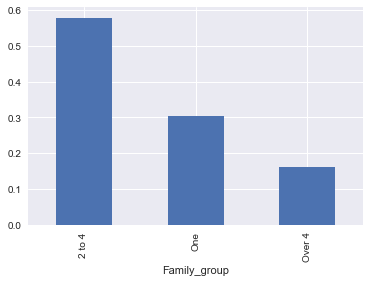

In [14]:
df.groupby('Family_group').mean()['Survived'].plot('bar')

In [6]:
df.groupby('Family_group').mean()['Survived']

Family_group
0    0.303538
1    0.578767
2    0.161290
Name: Survived, dtype: float64

In [12]:
def val(data):
    if data['Family'] == 0:
        value = 0
    elif 1<= data['Family'] <=3:
        value = 1
    else:
        value = 2
    return value
        
df['Family_group'] = df.apply(val, axis=1)
df.groupby('Family_group').count()['Survived']

Family_group
0    537
1    292
2     62
Name: Survived, dtype: int64

In [15]:
Title_Dictionary = { 
                    "Capt":"Officer",
                    "Col":"Officer",
                    "Major":"Officer",
                    "Jonkheer":"Royalty", 
                    "Don":"Royalty",
                    "Sir":"Royalty",
                    "Dr":"Officer", 
                    "Rev":"Officer",
                    "the Countess":"Royalty",
                    "Dona":"Royalty",
                    "Mme":"Mrs",
                    "Mlle":"Miss",
                    "Ms":"Mrs",
                    "Mr":"Mr",
                    "Mrs":"Mrs",
                    "Miss":"Miss",
                    "Master":"Master",
                    "Lady":"Royalty"
                    }

In [16]:
df['Name_title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df['Name_title'] = df['Name_title'].map(Title_Dictionary)

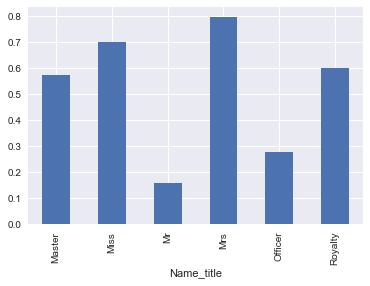

In [17]:
df.groupby('Name_title').mean()['Survived'].plot('bar')

In [18]:
df.groupby('Name_title').count()['Survived']

Name_title
Master      40
Miss       184
Mr         517
Mrs        127
Officer     18
Royalty      5
Name: Survived, dtype: int64

In [28]:
df['Cabin_N'] = df['Cabin'].astype('str').str[0]

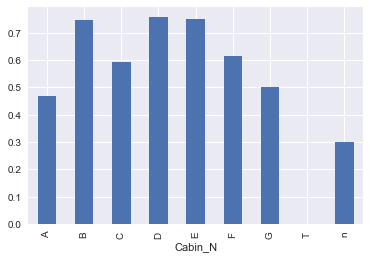

In [29]:
df.groupby('Cabin_N').mean()['Survived'].plot(kind='bar')

In [ ]:
def family_recode(data):
    if data['Family'] == 0:
        value = 'One'
    elif 1<= data['Family'] <=3:
        value = '2 to 4'
    else:
        value = 'Over 4'
    return value

In [ ]:
def age_recode(row):
    if row['Age'] < 16:
        value = 1
    else:
        value = 0
    return value

In [ ]:
def data_process(df_preprocess):
    df_preprocess['Sex'] = [1 if i == 'male' else 0 for i in df_preprocess.Sex]
    df_preprocess['Name_title'] = df_preprocess['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
    df_preprocess['Name_title'] = df_preprocess['Name_title'].map(Title_Dictionary)
    df_preprocess['Cabin_N'] = df_preprocess['Cabin'].astype('str').str[0]
    df_preprocess['Family'] = df_preprocess['SibSp'] + df_preprocess['Parch']
    df_preprocess['Family_group'] = df_preprocess.apply(family_recode, axis=1)
    df_preprocess['Child'] = df_preprocess.apply(age_recode, axis=1)
    
    Pclass_dummies = pd.get_dummies(df_preprocess.Pclass,prefix='Class')
    Embarked_dummies = pd.get_dummies(df_preprocess.Embarked,prefix='Embarked')
    Title_dummies = pd.get_dummies(df_preprocess.Name_title, prefix='Title')
    Cabin_dummies = pd.get_dummies(df_preprocess.Cabin_N,prefix='Cabin')
    Family_group_dummies = pd.get_dummies(df_preprocess.Family_group, prefix='Family')
    
    df_preprocess = pd.concat([df_preprocess,Pclass_dummies,Embarked_dummies,Family_group_dummies,Title_dummies,Cabin_dummies],axis=1)
    df_preprocess.drop(['Pclass','Embarked','Ticket',
                        'Family','SibSp','Parch','Family_group','Name','Cabin','Cabin_N','Name_title'],axis=1,inplace=True)
    return df_preprocess